In [1]:
suppressMessages({
    library(Seurat)
    library(SeuratWrappers)
    library(tidyverse)
    library(harmony)
    library(ggrepel)
    library(ggrastr)
    library(magrittr)
    # GO enrich use packages
    library(DOSE)
    library(clusterProfiler)
    library(org.Hs.eg.db)
    library(ggplot2)
    library(dplyr)
    library(topGO)
    library(GSEABase)
    library(stringr)
    library(RColorBrewer)
    ## RNA velocity
    library(velocyto.R)
})

# load vars and functions

In [315]:
save.image("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/tmp_new_Fig2.RData")

In [3]:
load("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/tmp_new_Fig2.RData")

In [4]:
suppressMessages(
    source("~/project/2020-6-18-IVDD_scRNA/scripts/R_scripts/preferable_scripts/common_use_functions.R")
)  

In [1]:
np.ppe <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/NPandSomePro_SeuratObj_noE.Rds")

In [255]:
saveRDS(np.ppe, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/NPandSomePro_SeuratObj_noE.Rds")

In [5]:
Idents(np.ppe) %>% unique()

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC             
Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor NPPC

In [ ]:
np.ppe.new.MAST.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

In [20]:
select.df <- filter(np.ppe.new.MAST.markers, cluster %in% c("EffectorNP"))

In [21]:
select.df <- select.df[order(select.df$avg_log2FC, decreasing=T),]

In [259]:
 write.table(np.ppe.MAST.markers, 
             file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/NP_progenitors_MAST_markers.csv",
             row.names=F, quote=F)

In [7]:
np.ppe$ct.pro.effector.np %>% unique()

[1] "ossification_effector_NP"      "HomNP_1"                      
 [3] "HTNP"                          "CD24+ progenitor"             
 [5] "MKI67+ progenitor"             "stem_implantation_effector_NP"
 [7] "cartilage_dev_effector_NP"     "hom_effector_NP"              
 [9] "RegNP"                         "CYTL1+ NP"                    
[11] "TRIB3+ NP"                     "HomNP_2"                      
[13] "coagulation_effector_NP"

In [8]:
Idents(np.ppe) <- np.ppe$ct.pro.effector.np

In [9]:
np.ppe.MAST.effector.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

Calculating cluster ossification_effector_NP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HomNP_1


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HTNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster CD24+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster MKI67+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster stem_implantation

In [10]:
 write.table(np.ppe.MAST.effector.markers, 
             file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_ppe_MAST_include_sub_effectors_markers.txt",
             sep='\t', row.names=F, quote=F)

# test percentage

In [11]:
celltype.sample.count <- table(np.ppe$sample_name, Idents(np.ppe)) %>% as.data.frame()
colnames(celltype.sample.count) <- c("sample", "celltype", "cell.num")

celltype.sample.count <- celltype.sample.count %>% group_by(sample) %>% do({
    df <- .
    df$ratio <- df$cell.num / sum(df$cell.num) * 100
    df
})

celltype.sample.count$sample <- as.character(celltype.sample.count$sample)
celltype.sample.count$celltype <- as.character(celltype.sample.count$celltype)
celltype.sample.count$grade <- substr(celltype.sample.count$sample, start=1, stop=2)

In [19]:
# HTNP
d1.HTNP <- celltype.sample.count %>% filter(celltype == "HTNP" & grade == "D1") %>% `[`("ratio") %>% unlist()
dg.HTNP <- celltype.sample.count %>% filter(celltype == "HTNP" & grade != "D1") %>% `[`("ratio") %>% unlist()

# NPPC
d1.NPPC <- celltype.sample.count %>% filter(celltype == "NPPC" & grade == "D1") %>% `[`("ratio") %>% unlist()
dg.NPPC <- celltype.sample.count %>% filter(celltype == "NPPC" & grade != "D1") %>% `[`("ratio") %>% unlist()

# EffectorNP
d1.efNP <- celltype.sample.count %>% filter(celltype == "EffectorNP" & grade == "D1") %>% `[`("ratio") %>% unlist()
dg.efNP <- celltype.sample.count %>% filter(celltype == "EffectorNP" & grade != "D1") %>% `[`("ratio") %>% unlist()

In [31]:
wilcox.test(d1.efNP, dg.efNP,  alternative = "greater")


	Wilcoxon rank sum exact test

data:  d1.efNP and dg.efNP
W = 17, p-value = 0.2198
alternative hypothesis: true location shift is greater than 0


In [29]:
dg.NPPC
d1.NPPC

ratio1    ratio2    ratio3    ratio4    ratio5    ratio6    ratio7    ratio8 
26.560178  8.841733 14.540743  9.697753  5.855120  6.739644 11.145671  4.413146 
   ratio9   ratio10   ratio11   ratio12 
 3.871967  8.426623  9.269933  7.983979

ratio1    ratio2 
 8.812261 24.215143

In [32]:
d1.efNP
dg.efNP

ratio1   ratio2 
16.88771 63.45799

ratio1   ratio2   ratio3   ratio4   ratio5   ratio6   ratio7   ratio8 
46.95394 18.88594 30.92427 41.52255 11.51961 20.26186 22.91343 12.82361 
  ratio9  ratio10  ratio11  ratio12 
16.79573 13.49481 22.09414 16.55541

# plot PPE results

## refine NP PPE celltypes

In [5]:
levels(Idents(np.ppe))

[1] "Effector_NP"       "HomNP_1"           "HTNP"             
[4] "CD24+ progenitor"  "MKI67+ progenitor" "RegNP"            
[7] "CYTL1+ NP"         "TRIB3+ NP"         "HomNP_2"

In [205]:
np.ppe$ct.np.detail.refine %>% unique()

[1] "ossification_effector_NP"      "HomNP"                        
 [3] "HTNP"                          "CD24+ progenitor"             
 [5] "MKI67+ progenitor"             "stem_implantation_effector_NP"
 [7] "cartilage_dev_effector_NP"     "NPPC_2"                       
 [9] "CYTL1+ NP"                     "TRIB3+ NP"                    
[11] "NPPC_1"                        "NPPC_3"

In [206]:
np.ppe$ct.np.detail.refine <- 
    plyr::mapvalues(np.ppe$ct.np.detail.refine, 
                    from = "stem_implantation_effector_NP",
                    to = "pre-ossification_effector_NP")

In [22]:
# options(repr.plot.width=14, repr.plot.height=10)
# DimPlot(np.ppe, label = T, group.by = "ct.ppe")

In [19]:
# options(repr.plot.width=14, repr.plot.height=10)
# DimPlot(np.ppe, label = T, group.by = "ct.pro.effector.np")

In [9]:
np.ppe@meta.data$ct.np.detail.refine <- 
    plyr::mapvalues(np.ppe@meta.data$ct.pro.effector.np,
                    from = c("HomNP_2", "RegNP", "HomNP_1", "hom_effector_NP", "coagulation_effector_NP"),
                    to = c("NPPC_1", "NPPC_2", "HomNP", "HomNP", "NPPC_3"))

In [20]:
#DimPlot(np.ppe, label = T, group.by = "ct.np.detail.refine")

In [15]:
np.ppe@meta.data$ct.ppe.new <- 
    plyr::mapvalues(np.ppe@meta.data$ct.np.detail.refine,
                    from = c(paste0("NPPC_", seq(1,3)), "cartilage_dev_effector_NP", "stem_implantation_effector_NP", "ossification_effector_NP"),
                    to = c(rep("NPPC", 3), rep("EffectorNP", 3)))

In [21]:
# options(repr.plot.width=14, repr.plot.height=10)
# DimPlot(np.ppe, label = T, group.by = "ct.ppe.new")

## set np.ppe celltype colors

In [28]:
Idents(np.ppe) <- np.ppe$ct.ppe.new
ppe.ct.color.df <- data.frame(celltype = levels(Idents(np.ppe)),
                              color = brewer.pal(length(levels(Idents(np.ppe))), "Set1"))
ppe.ct.color.df$celltype <- as.character(ppe.ct.color.df$celltype)
ppe.ct.color <- structure(unlist(ppe.ct.color.df$color) %>% as.character(), names = unlist(ppe.ct.color.df$celltype))

In [247]:
saveRDS(ppe.ct.color.df, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/color_set/np_ppe_color_df.Rds")

In [249]:
write.table(ppe.ct.color.df, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/color_set/np_ppe_color_df.txt",
            row.names = F, quote=F, sep = '\t')

## plot np.ppe umap 

In [36]:
A.plot <- 
  plot.seu.raster(np.ppe)+ NoLegend() +
    scale_color_manual(values = ppe.ct.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

A.plot <- LabelClusters(A.plot, id = "ident", size = 5, repel = T, color="black")

In [2]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_subcelltype_UMAP.pdf", width=9)
A.plot
dev.off()

png 
  2

## check new markers GO
FindAllMarkers in np.ppe Seurat Object, and output the dataframe to file. Then checke their GO functions in Rstudio Server convenient

In [ ]:
np.ppe.new.MAST.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

In [32]:
write.table(np.ppe.new.MAST.markers, 
             file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_ppe_MAST_newctppe_markers.txt",
             sep='\t', row.names=F, quote=F)

## plot celltype ratios 

In [49]:
np.ppe.count <- table(Idents(np.ppe), np.ppe@meta.data$orig.ident) %>% as.data.frame()
colnames(np.ppe.count) <- c("cell.type", "grade", "cell.num")

In [50]:
np.ppe.count <- table(Idents(np.ppe), np.ppe@meta.data$orig.ident) %>% as.data.frame()
colnames(np.ppe.count) <- c("cell.type", "grade", "cell.num")
np.ppe.count <- 
    np.ppe.count %>% group_by(grade) %>% do({
        df <- .
        df$cell.ratio <- df$cell.num / sum(df$cell.num) * 100
        df
    })

In [52]:
subcelltype.ratio.bar <- 
  np.ppe.count %>% 
    ggplot() +
    geom_bar(aes(x=grade, y=cell.ratio, fill=cell.type), stat = "identity") +
      scale_fill_manual(values = ppe.ct.color) + 
      scale_y_continuous(limits = c(0,100), expand = c(0.01,0.01), 
                         breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%")) +
      labs(x="", y="", fill="Cell Type") + 
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            panel.border = element_rect(colour = "black", fill=NA, size=1),
            axis.line = element_line(colour = "black"),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title = element_text(size = 25),
            legend.text = element_text(size = 20),
            legend.title = element_text(size = 25))

In [54]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_subcelltype_ratio_bar.pdf")
subcelltype.ratio.bar
dev.off()

png 
  2

### check progenitors ratio vars

In [75]:
np.ppe.sample.count <- table(Idents(np.ppe), np.ppe@meta.data$sample_name) %>% as.data.frame()
colnames(np.ppe.sample.count) <- c("cell.type", "sample", "cell.num")

In [9]:
unique(Idents(np.ppe))

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC             
Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor NPPC

In [8]:
np.ppe.sample.count <- table(Idents(np.ppe), np.ppe@meta.data$sample_name) %>% as.data.frame()
colnames(np.ppe.sample.count) <- c("cell.type", "sample", "cell.num")
np.ppe.sample.count  <- 
    np.ppe.sample.count %>% group_by(sample) %>% do({
        df <- .
        df$cell.ratio <- df$cell.num / sum(df$cell.num) * 100
        df
    })

In [13]:
np.ppe.sample.count$sample <- as.character(np.ppe.sample.count$sample)
np.ppe.sample.count$grade <- str_sub(np.ppe.sample.count$sample, start = 1, end = 2)

In [95]:
pro.count <- np.ppe.sample.count %>% filter(cell.type %in% c("CD24+ progenitor", "MKI67+ progenitor"))

In [98]:
pro.count.plot <- pro.count %>% group_by(grade, cell.type) %>% summarise(mean.ratio = mean(cell.ratio), sd.ratio = sd(cell.ratio))

`summarise()` has grouped output by 'grade'. You can override using the `.groups` argument.



In [115]:
pro.ratio.p <- 
    pro.count.plot %>% 
        ggplot(aes(x=grade, y=mean.ratio, group=cell.type, color=cell.type)) + 
        geom_point() +
        geom_line() +
        geom_errorbar(aes(ymin=mean.ratio-sd.ratio, ymax=mean.ratio+sd.ratio), width=0.2) +
        geom_hline(yintercept=c(1, 2, 3), linetype="dotted", col="lightgrey") +
        scale_y_continuous(labels = paste0(c(0, 1, 2, 3, 4), "%")) +
        scale_color_manual(values=c("blue", "red")) +
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              #axis.line = element_line(colour = "black"),
              axis.text.x = element_text(size = 14),
              axis.text.y = element_text(size = 14),
              legend.text = element_text(size = 14),
              legend.title = element_text(size = 14),
              axis.title = element_text(size=20),
              legend.background = element_blank(),
              legend.key=element_blank()
              ) +
      labs(x="", y="% of all nucleus pulposus and progenitor cells", color="Cell type")

In [118]:
pdf("~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/NP_PPE_progenitors_ratio_point.pdf", width = 7)
pro.ratio.p
dev.off()

png 
  2

## plot heatmap

In [194]:
np.ppe.new.MAST.markers %>%
  group_by(cluster) %>%
  top_n(n = 10, wt = avg_log2FC) -> top10

In [191]:
random.cells <- sample(colnames(np.ppe), size = 5000)

In [192]:
head(np.ppe.new.MAST.markers)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster    gene   
MSMP    0     1.824416   0.420 0.229 0         EffectorNP MSMP   
COL2A1  0     1.353486   0.963 0.854 0         EffectorNP COL2A1 
SPARC   0     1.286587   0.966 0.829 0         EffectorNP SPARC  
COL1A2  0     1.175912   0.828 0.593 0         EffectorNP COL1A2 
COL11A1 0     1.150648   0.932 0.773 0         EffectorNP COL11A1
COL3A1  0     1.124470   0.801 0.553 0         EffectorNP COL3A1

In [35]:
subcelltype.heatmap <- 
  DoHeatmap(np.ppe, 
            features = top10$gene, 
            cells = random.cells, 
            label = T,
             group.colors = ppe.ct.color) #+ 
#     scale_fill_gradient2(low="blue", mid="yellow" , high="red")

In [36]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_FigS2_NP_PPE_subcelltype_heatmap.pdf", height=15,width=20)
subcelltype.heatmap
dev.off()

png 
  2

##  plot cell cycle

In [200]:
Idents(np.ppe) <- np.ppe$Phase

In [201]:
Idents(np.ppe) <- np.ppe$Phase
cellcycle.plot <- 
  plot.seu.raster(np.ppe)+ NoAxes()

In [203]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_FigS2_NP_PPE_subcelltype_cellcycle_UMAP.pdf", width=9)
cellcycle.plot
dev.off()

png 
  2

In [204]:
Idents(np.ppe) <- np.ppe$ct.ppe.new

## FeaturePlot some genes

[[1]]


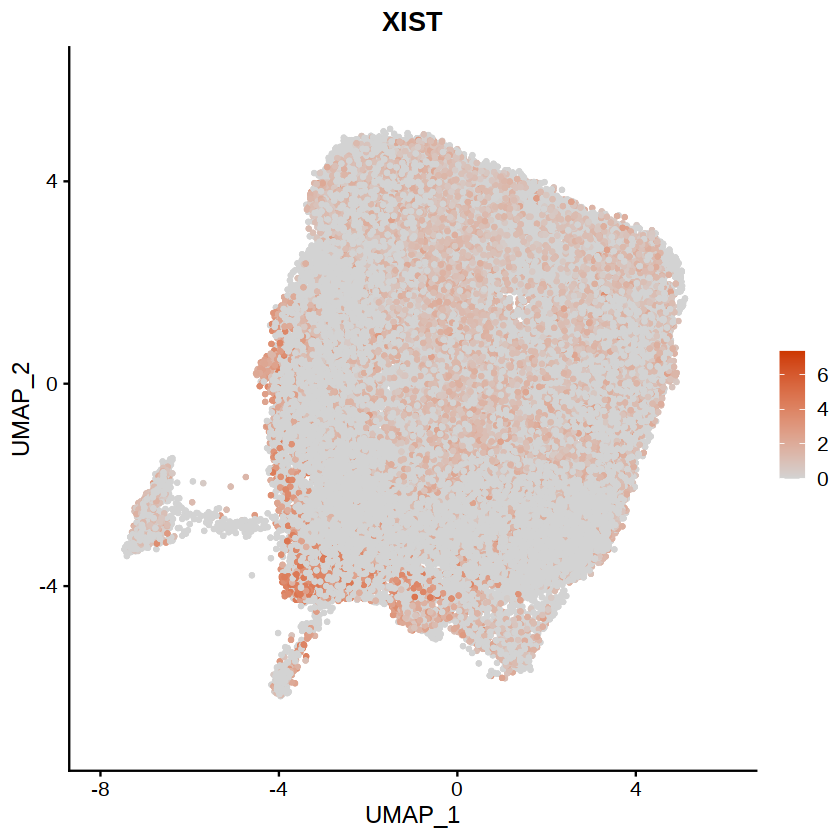

In [31]:
 FeaturePlot.ggrastr(np.ppe, 
                        features = c("XIST"), 
                        cols = c("lightgrey", "orangered3"), 
                        combine = FALSE,
                        raster = TRUE,
                        pt.size = 1)

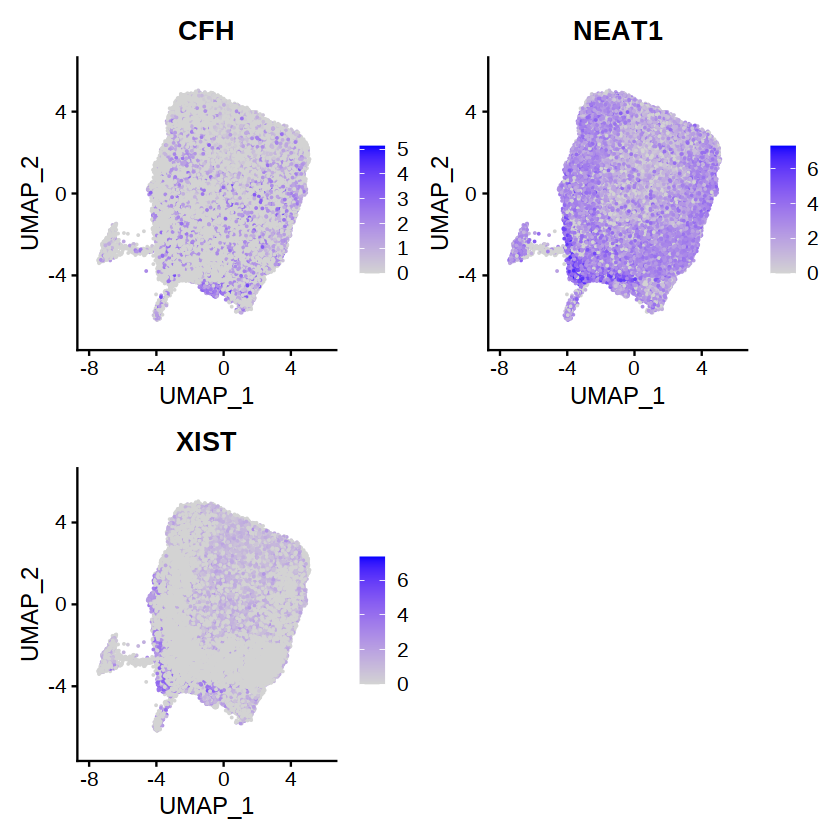

In [30]:
FeaturePlot(np.ppe, features = c("CFH", "NEAT1", "XIST"))

In [329]:
plot.list <- 
    FeaturePlot.ggrastr(np.ppe, 
                        features = c("CD24", "MKI67", "COL2A1", "NEAT1", "MMP3", "BMP2"), 
                        cols = c("lightgrey", "orangered3"), 
                        combine = FALSE,
                        raster = TRUE,
                        pt.size = 1)

In [330]:
for (i in seq(length(plot.list))) {
  plot.list[[i]] <- plot.list[[i]] + NoAxes() + NoLegend() +
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))
}

In [331]:
pdf(file = "~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_FigS2_NP_PPE_subcelltypefeatureplot.pdf", width = 28, height = 15)
cowplot::plot_grid(plotlist = plot.list, align = "hv", nrow = 2, ncol=3)
dev.off()

png 
  2

# plot progenitors and EffectorNP NPPC CYTL1+ 

In [119]:
penc.seu <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/test_check_diff_seu.Rds")

In [240]:
saveRDS(penc.seu, file="/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/test_check_diff_seu.Rds")

In [187]:
cell.meta.df <- penc.seu@meta.data %>% dplyr::select(orig.ident, sample_name)

In [188]:
head(cell.meta.df)

orig.ident sample_name
D1_1_AAACCCATCGCTAATG-1 D1         D1_1       
D1_1_AAACGAACAAGGAGTC-1 D1         D1_1       
D1_1_AAACGCTGTCAACCAT-1 D1         D1_1       
D1_1_AAAGAACAGGACATCG-1 D1         D1_1       
D1_1_AAAGAACGTACTGGGA-1 D1         D1_1       
D1_1_AAAGAACTCTCGGCTT-1 D1         D1_1

In [189]:
nrow(cell.meta.df)

[1] 20113

In [190]:
write.table(cell.meta.df,
            file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_penc_celltype_infos.txt",
            sep='\t', quote=F)

## check marker genes

In [184]:
np.penc.new.MAST.markers <- 
    FindAllMarkers(penc.seu, min.pct = 0.2, only.pos = TRUE, test.use="MAST")
np.penc.new.MAST.markers <- np.penc.new.MAST.markers %>% filter(., p_val_adj < 0.05)

In [185]:
write.table(np.penc.new.MAST.markers, 
             file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_penc_MAST_markers.txt",
             sep='\t', row.names=F, quote=F)

## plot in ppe celltype

In [122]:
Idents(penc.seu) <- penc.seu$ct.ppe.new

In [124]:
penc.ct.color <- filter(ppe.ct.color.df, celltype %in% levels(Idents(penc.seu)))
penc.ct.color <- structure(penc.ct.color$color, names=penc.ct.color$celltype)

In [251]:
penc.ct.color

EffectorNP  CD24+ progenitor MKI67+ progenitor              NPPC 
        "#E41A1C"         "#984EA3"         "#FF7F00"         "#FFFF33" 
        CYTL1+ NP 
        "#A65628"

In [250]:
ppe.ct.color.df

celltype          color  
1 EffectorNP        #E41A1C
2 HomNP             #377EB8
3 HTNP              #4DAF4A
4 CD24+ progenitor  #984EA3
5 MKI67+ progenitor #FF7F00
6 NPPC              #FFFF33
7 CYTL1+ NP         #A65628
8 TRIB3+ NP         #F781BF

In [126]:
C.plot <- 
  plot.seu.raster(penc.seu)+ NoLegend() +
    scale_color_manual(values = penc.ct.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

C.plot <- LabelClusters(C.plot, id = "ident", size = 5, repel = T, color="black")

In [129]:
unique(penc.seu$ct.np.detail.refine)

[1] "ossification_effector_NP"      "CD24+ progenitor"             
[3] "MKI67+ progenitor"             "stem_implantation_effector_NP"
[5] "cartilage_dev_effector_NP"     "NPPC_2"                       
[7] "CYTL1+ NP"                     "NPPC_1"                       
[9] "NPPC_3"

In [130]:
np.ppe$ct.np.detail.refine %>% unique()

[1] "ossification_effector_NP"      "HomNP"                        
 [3] "HTNP"                          "CD24+ progenitor"             
 [5] "MKI67+ progenitor"             "stem_implantation_effector_NP"
 [7] "cartilage_dev_effector_NP"     "NPPC_2"                       
 [9] "CYTL1+ NP"                     "TRIB3+ NP"                    
[11] "NPPC_1"                        "NPPC_3"

In [165]:
np.detail.color.df <- data.frame(celltype=unique(np.ppe$ct.np.detail.refine),
                                 stringsAsFactors=F)

In [166]:
np.detail.color.df <- left_join(np.detail.color.df, ppe.ct.color.df) 

Joining, by = "celltype"



In [ ]:
unique(Idents())

In [164]:
# sub.effector.nppc.color <- data.frame(celltype=c("ossification_effector_NP", "stem_implantation_effector_NP", "cartilage_dev_effector_NP",
#                                                  "NPPC_3", "NPPC_2", "NPPC_1"),
#                                       color=rev(brewer.pal(9, "YlOrRd")[3:8]),
#                                       stringsAsFactors=F)  
sub.effector.nppc.color <- data.frame(celltype=c("EffectorNP",
                                                 "NPPC_3", "NPPC_2", "NPPC_1"),
                                      color=brewer.pal(6, "Set3"),
                                      stringsAsFactors=F)  

In [167]:
np.detail.color.df <- merge(np.detail.color.df, sub.effector.nppc.color, all=TRUE)
np.detail.color.df <- filter(np.detail.color.df, !is.na(color))

In [253]:
np.detail.color.df$celltype <- 
    plyr::mapvalues(np.detail.color.df$celltype, 
                    from= "stem_implantation_effector_NP", 
                    to = "pre-ossification_effector_NP")

In [255]:
saveRDS(np.detail.color.df, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/color_set/np_detail_celltype_color_df.Rds")

In [256]:
write.table(np.detail.color.df, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/color_set/np_detail_celltype_color_df.txt",
            row.names=F, quote=F, sep='\t') 

## plot in np.detail

In [157]:
Idents(penc.seu) <- penc.seu$ct.np.detail.refine

In [168]:
nppc.detail.color.df <- filter(np.detail.color.df, celltype %in% levels(Idents(penc.seu)))

In [169]:
nppc.detail.color <- structure(nppc.detail.color.df$color, names=nppc.detail.color.df$celltype)

In [170]:
C1.plot <- 
  plot.seu.raster(penc.seu)+ NoLegend() +
    scale_color_manual(values = nppc.detail.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

C1.plot <- LabelClusters(C1.plot, id = "ident", size = 5, repel = T, color="black")

In [172]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_proEffectorNPPCYTL1_subcelltype_UMAP.pdf", width=9)
C1.plot
dev.off()

png 
  2

In [209]:
penc.seu$ct.np.detail.refine  <- 
    plyr::mapvalues(penc.seu$ct.np.detail.refine, 
                    from = "stem_implantation_effector_NP",
                    to = "pre-ossification_effector_NP")

In [210]:
Idents(penc.seu) <- penc.seu$ct.np.detail.refine

# plot only NP

In [173]:
np <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/new_noC03_NP_SeuratObj.Rds")

In [212]:
saveRDS(np, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/new_noC03_NP_SeuratObj.Rds")

In [211]:
np$ct.np.detail.refine  <- 
    plyr::mapvalues(np$ct.np.detail.refine, 
                    from = "stem_implantation_effector_NP",
                    to = "pre-ossification_effector_NP")

In [176]:
Idents(np) <- np$ct.ppe.new

In [178]:
np.color <- filter(ppe.ct.color.df, celltype %in% levels(Idents(np)))
np.color <- structure(np.color$color, names=np.color$celltype)

In [179]:
np.plot <- 
  plot.seu.raster(np)+ NoLegend() +
    scale_color_manual(values = np.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

np.plot <- LabelClusters(np.plot, id = "ident", size = 5, repel = T, color="black")

In [181]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_subcelltype_UMAP.pdf", width=9)
np.plot
dev.off()

png 
  2

# compare normal, early and serious NP GO change

In [11]:
Idents(np) %>% unique()

[1] EffectorNP HomNP      HTNP       NPPC       CYTL1+ NP  TRIB3+ NP 
Levels: EffectorNP HomNP HTNP NPPC CYTL1+ NP TRIB3+ NP

In [8]:
np.ppe@meta.data$IVD_grade2 <- 
    plyr::mapvalues(np.ppe@meta.data$orig.ident,
                    from = c("D1", "D2", "D3", "D4", "D5"),
                    to = c("normal", "early", "early", "serious", "serious"))

In [9]:
np.ppe@meta.data$IVD_grade2 %>% unique()

[1] "normal"  "early"   "serious"

In [10]:
normal.de <- FindMarkers(np.ppe, ident.1 = "normal", group.by = "IVD_grade2", test.use = "MAST")


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!



# merge CYTL1+ and TIBR3+ NP to HomNP

In [9]:
options(repr.plot.width=14, repr.plot.height=10)

In [8]:
np.ppe@meta.data$ct.ppe.new2 <- 
    plyr::mapvalues(x = np.ppe@meta.data$ct.ppe.new,
                    from = c("CYTL1+ NP", "TRIB3+ NP"),
                    to = c("EffectorNP", "HomNP"))

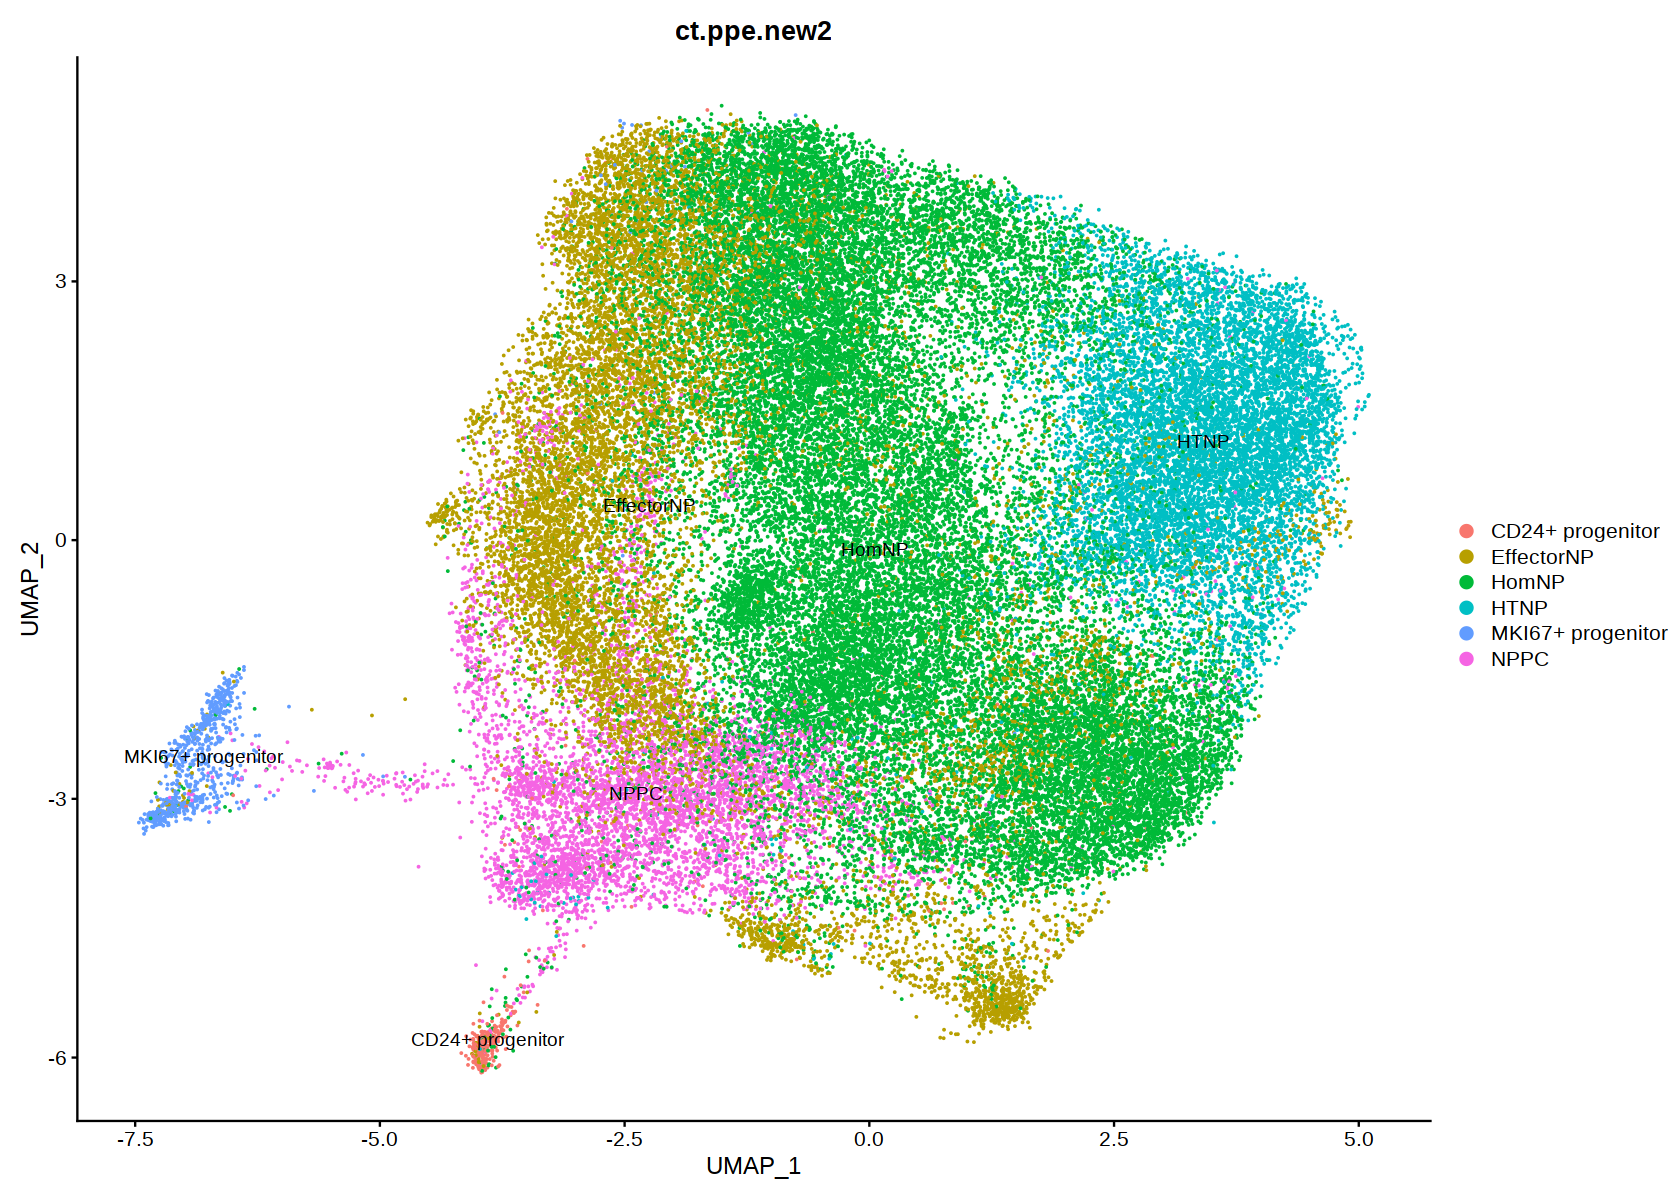

In [11]:
DimPlot(np.ppe, label = T, group.by = "ct.ppe.new2")

In [12]:
unique(np.ppe@meta.data$ct.np.detail.refine)

[1] "ossification_effector_NP"     "HomNP"                       
 [3] "HTNP"                         "CD24+ progenitor"            
 [5] "MKI67+ progenitor"            "pre-ossification_effector_NP"
 [7] "cartilage_dev_effector_NP"    "NPPC_2"                      
 [9] "CYTL1+ NP"                    "TRIB3+ NP"                   
[11] "NPPC_1"                       "NPPC_3"

In [13]:
Idents(np.ppe) <- np.ppe$ct.ppe.new2
ppe.ct.color.df <- data.frame(celltype = levels(Idents(np.ppe)),
                              color = brewer.pal(length(levels(Idents(np.ppe))), "Set1"))
ppe.ct.color.df$celltype <- as.character(ppe.ct.color.df$celltype)
ppe.ct.color <- structure(unlist(ppe.ct.color.df$color) %>% as.character(), names = unlist(ppe.ct.color.df$celltype))

In [14]:
ppe.ct.color

EffectorNP             HomNP              HTNP  CD24+ progenitor 
        "#E41A1C"         "#377EB8"         "#4DAF4A"         "#984EA3" 
MKI67+ progenitor              NPPC 
        "#FF7F00"         "#FFFF33"

## re-plot new np ppe UMAP

In [18]:
A.plot <- 
  plot.seu.raster(np.ppe)+ NoLegend() +
    scale_color_manual(values = ppe.ct.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

A.plot <- LabelClusters(A.plot, id = "ident", size = 5, repel = T, color="black")

In [20]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_subcelltype_UMAP_noCYTL_TRBI3.pdf", width=9)
A.plot
dev.off()

png 
  2

## check GO

In [21]:
np.ppe.new.MAST.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

Calculating cluster EffectorNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HomNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HTNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster CD24+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster MKI67+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster NPPC


Done!

Combining coefficie

In [22]:
write.table(np.ppe.new.MAST.markers, 
        file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_ppe_MAST_newctppe_markers_noCYTL_TRBI3.txt",
        sep='\t', row.names=F, quote=F)

# test re-assign celltype

In [234]:
penc.ss.ct <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/PENC/slingshot_ct.Rds")

In [235]:
head(penc.ss.ct)

cellname                celltype    
1 D1_1_AAACCCATCGCTAATG-1 EffectorNP_3
2 D1_1_AAACGAACAAGGAGTC-1 EffectorNP_3
3 D1_1_AAACGCTGTCAACCAT-1 EffectorNP_3
4 D1_1_AAAGAACAGGACATCG-1 EffectorNP_3
5 D1_1_AAAGGGCAGGATTACA-1 EffectorNP_3
6 D1_1_AAAGGGCCAATTCTTC-1 EffectorNP_3

In [236]:
np.ppe@meta.data$ct.np.detail.refine %>% unique()

[1] "ossification_effector_NP"     "HomNP"                       
 [3] "HTNP"                         "CD24+ progenitor"            
 [5] "MKI67+ progenitor"            "pre-ossification_effector_NP"
 [7] "cartilage_dev_effector_NP"    "NPPC_2"                      
 [9] "CYTL1+ NP"                    "TRIB3+ NP"                   
[11] "NPPC_1"                       "NPPC_3"

In [241]:
np.ppe@meta.data$ct.np.detail.refine2 <- np.ppe@meta.data$ct.np.detail.refine %>% as.character()

In [242]:
np.ppe@meta.data[penc.ss.ct$cellname, "ct.np.detail.refine2"] <- penc.ss.ct$celltype %>% as.character()

In [246]:
np.ppe@meta.data$ct.np.detail.refine2 <- 
    plyr::mapvalues(x=np.ppe@meta.data$ct.np.detail.refine2,
                    from=c("TRIB3+ NP"),
                    to=c("HomNP"))

In [247]:
np.ppe@meta.data$test.ppe <- gsub("_\\d", "", np.ppe@meta.data$ct.np.detail.refine2)

In [248]:
unique(np.ppe@meta.data$test.ppe)

[1] "EffectorNP"        "HomNP"             "HTNP"             
[4] "CD24+ progenitor"  "MKI67+ progenitor" "NPPC"

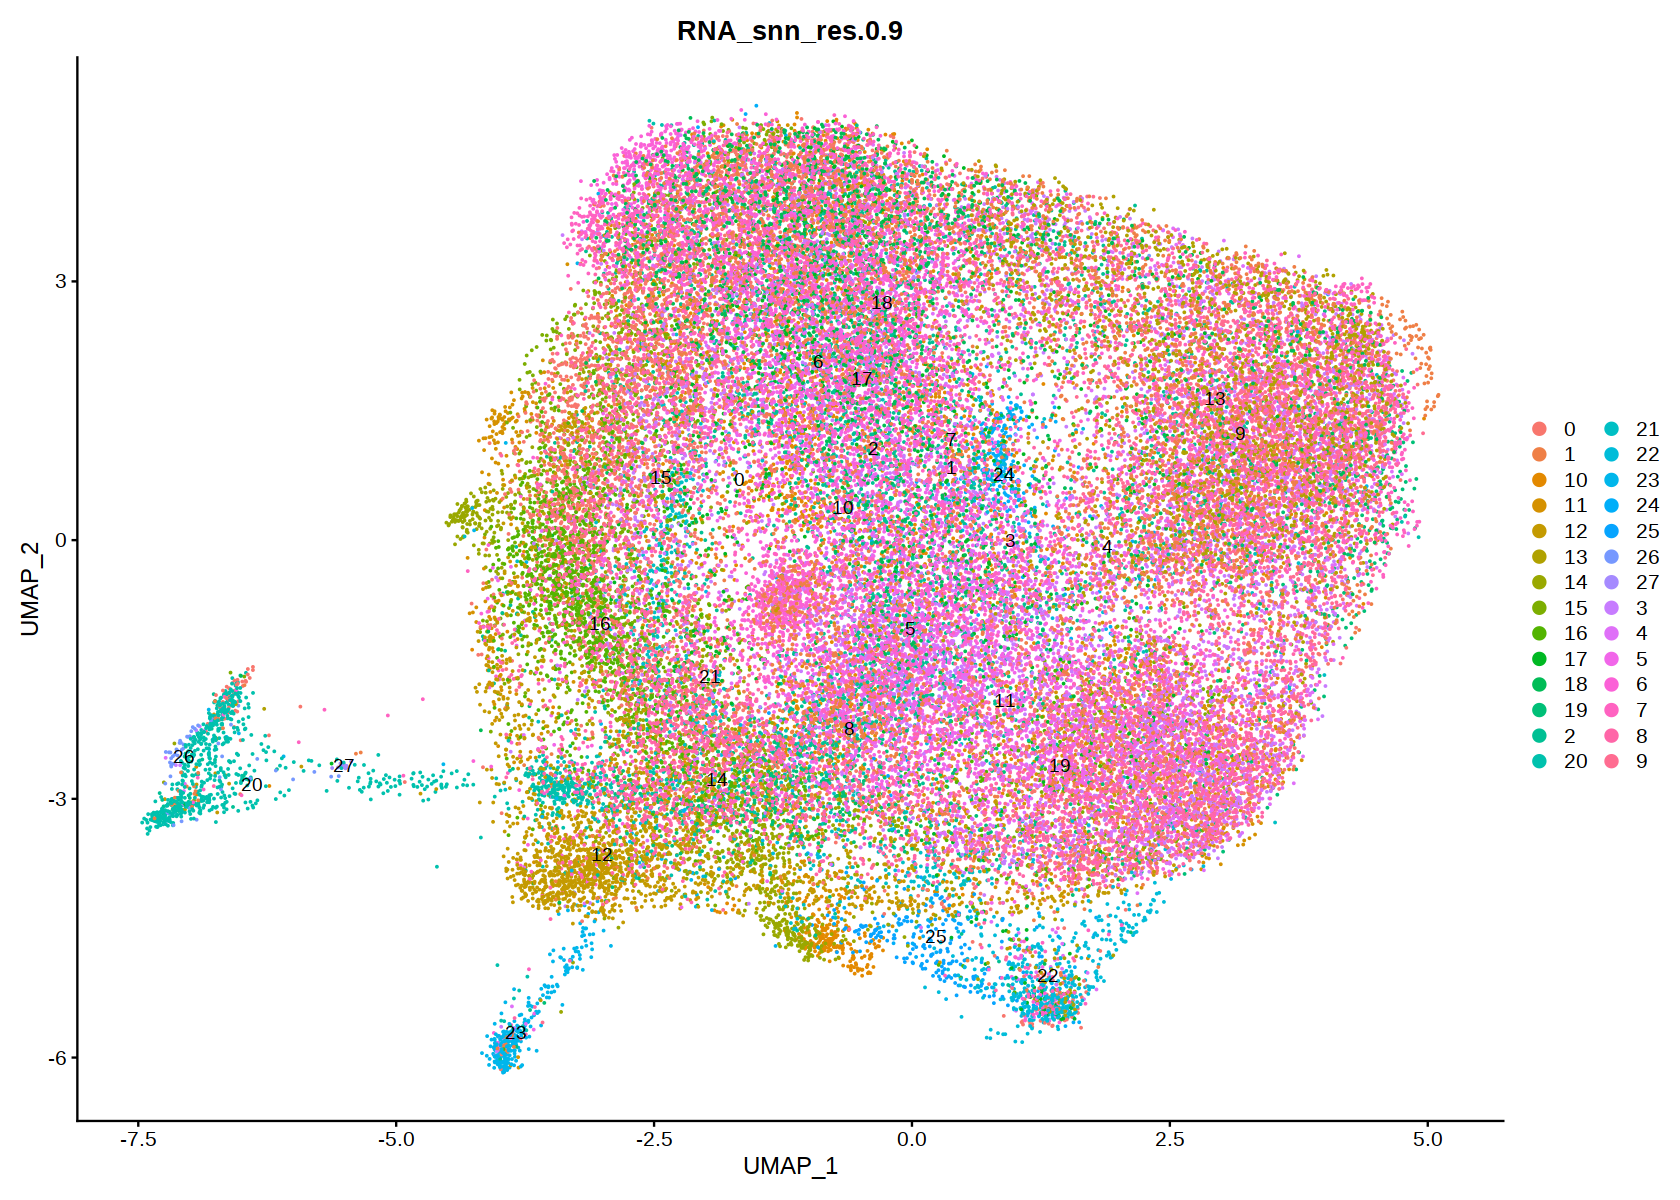

In [142]:
DimPlot(np.ppe, label = T, group.by = "RNA_snn_res.0.9")

In [143]:
Idents(np.ppe) <- np.ppe@meta.data$RNA_snn_res.0.9

In [27]:
np.ppe.0.9.MAST.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

Calculating cluster 0


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster 1


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster 10


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster 11


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster 12


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster 13


Done!

Combining coefficients and standard errors

Calculating log-fold 

In [28]:
write.table(np.ppe.0.9.MAST.markers, 
        file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_ppe_MAST_res09_markers.txt",
        sep='\t', row.names=F, quote=F)

In [222]:
np.ppe@meta.data$ct.ppe.new %>% unique()

[1] "EffectorNP"        "HomNP"             "HTNP"             
[4] "CD24+ progenitor"  "MKI67+ progenitor" "NPPC"             
[7] "CYTL1+ NP"         "TRIB3+ NP"

## re-sign base on res0.9

In [223]:
np.ppe@meta.data$test.ppe <- np.ppe@meta.data$ct.ppe.new %>%
    plyr::mapvalues(x=.,
                    from=c("CYTL1+ NP", "TRIB3+ NP"),
                    to=c("EffectorNP", "HomNP"))

In [224]:
unique(np.ppe@meta.data$test.ppe)

[1] "EffectorNP"        "HomNP"             "HTNP"             
[4] "CD24+ progenitor"  "MKI67+ progenitor" "NPPC"

In [249]:
np.ppe.count.test <- table(np.ppe@meta.data$test.ppe, np.ppe@meta.data$orig.ident) %>% as.data.frame()
colnames(np.ppe.count.test) <- c("cell.type", "grade", "cell.num")
np.ppe.count.test <- 
    np.ppe.count.test %>% group_by(grade) %>% do({
        df <- .
        df$cell.ratio <- df$cell.num / sum(df$cell.num) * 100
        df
    })

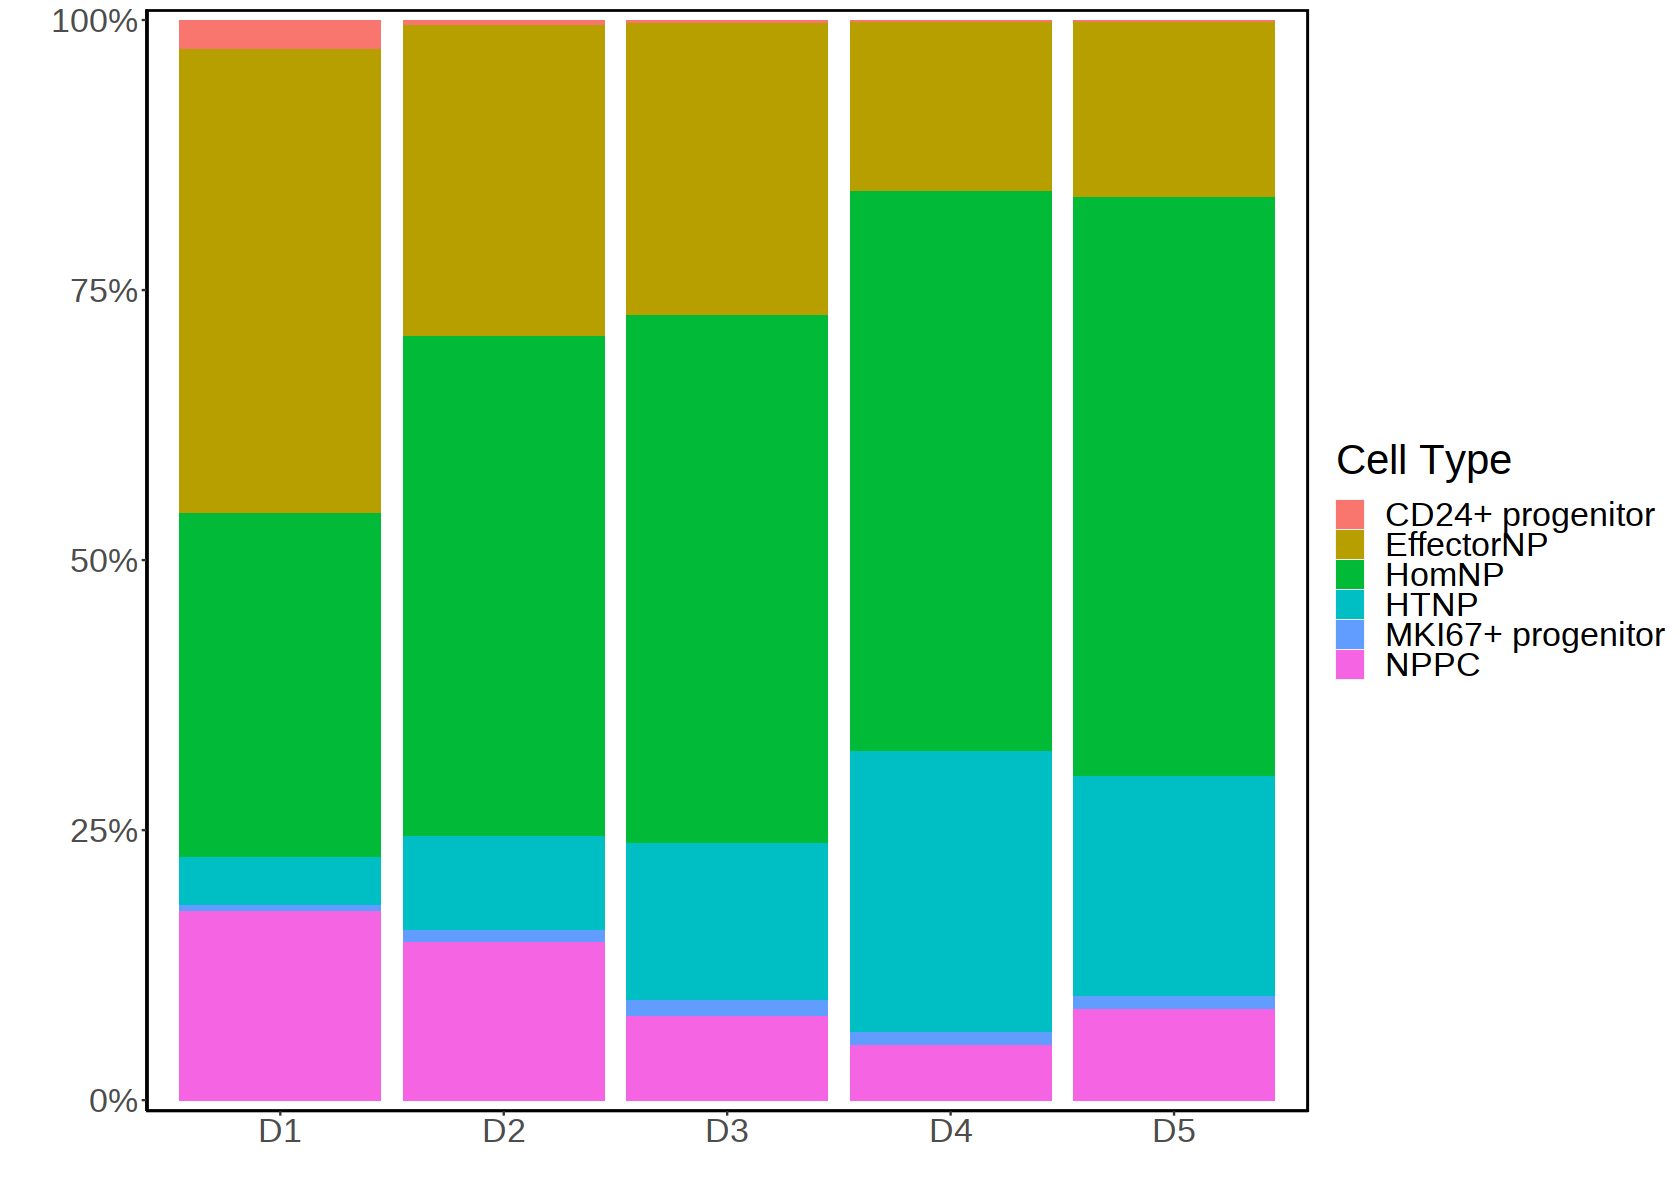

In [250]:
np.ppe.count.test %>% 
    ggplot() +
    geom_bar(aes(x=grade, y=cell.ratio, fill=cell.type), stat = "identity") +
      #scale_fill_manual(values = ppe.ct.color) + 
      scale_y_continuous(limits = c(0,100), expand = c(0.01,0.01), 
                         breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%")) +
      labs(x="", y="", fill="Cell Type") + 
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            panel.border = element_rect(colour = "black", fill=NA, size=1),
            axis.line = element_line(colour = "black"),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title = element_text(size = 25),
            legend.text = element_text(size = 20),
            legend.title = element_text(size = 25))

In [251]:
Idents(np.ppe) <- np.ppe@meta.data$test.ppe

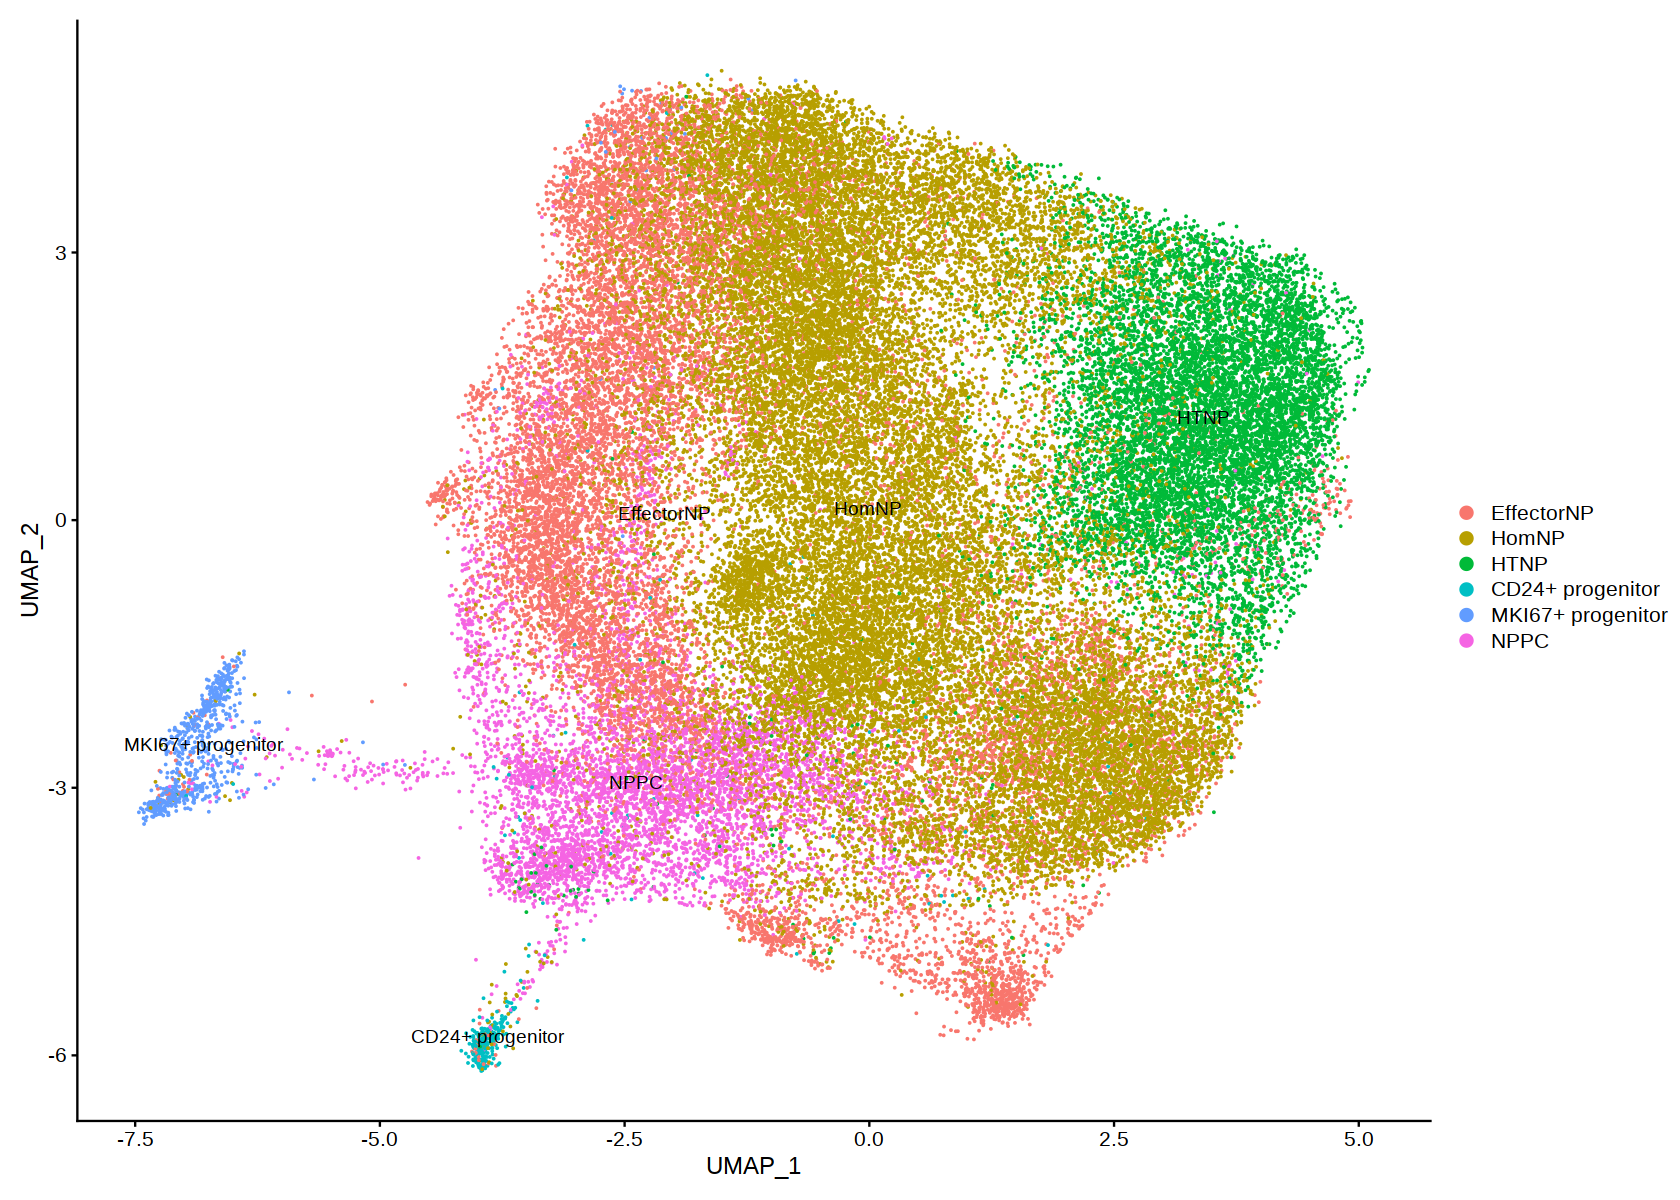

In [252]:
DimPlot(np.ppe, label = T)

In [229]:
np.ppe.test.MAST.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

Calculating cluster EffectorNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HomNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HTNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster CD24+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster MKI67+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster NPPC


Done!

Combining coefficie

In [230]:
write.table(np.ppe.test.MAST.markers, 
        file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_ppe_MAST_test_markers.txt",
        sep='\t', row.names=F, quote=F)

## new penc

In [231]:
unique(Idents(np.ppe))

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC             
Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor NPPC

In [253]:
new.penc <- subset(np.ppe, idents = c("EffectorNP", "NPPC", "CD24+ progenitor", "MKI67+ progenitor"))

In [254]:
saveRDS(new.penc, 
        file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/PENC/new_np_penc_seu.Rds")

In [140]:
new.penc <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/PENC/new_np_penc_seu.Rds")

## re-plot new identity results

In [75]:
unique(Idents(np.ppe))

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC              test_ossf        
7 Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor ... test_ossf

In [77]:
unique(np.ppe@meta.data$test.ppe)

[1] "EffectorNP"        "HomNP"             "HTNP"             
[4] "CD24+ progenitor"  "MKI67+ progenitor" "NPPC"             
[7] "test_ossf"

In [78]:
np.ppe@meta.data$test.ppe[np.ppe@meta.data$test.ppe == "test_ossf"] <- "EffectorNP"

In [79]:
Idents(np.ppe) <- np.ppe@meta.data$test.ppe

### set celltype color

In [83]:
ppe.ct.color.df <- data.frame(celltype = levels(Idents(np.ppe)),
                              color = brewer.pal(length(levels(Idents(np.ppe))), "Set1"))
ppe.ct.color.df$celltype <- as.character(ppe.ct.color.df$celltype)
ppe.ct.color <- structure(unlist(ppe.ct.color.df$color) %>% as.character(), names = unlist(ppe.ct.color.df$celltype))

In [297]:
ppe.ct.color

EffectorNP             HomNP              HTNP  CD24+ progenitor 
        "#E41A1C"         "#377EB8"         "#4DAF4A"         "#984EA3" 
MKI67+ progenitor              NPPC 
        "#FF7F00"         "#FFFF33"

In [298]:
saveRDS(ppe.ct.color.df, 
        file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/PENC/np_ppe_color_df.Rds")

### re-plot umap

In [85]:
A.plot <- 
  plot.seu.raster(np.ppe)+ NoLegend() +
    scale_color_manual(values = ppe.ct.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

A.plot <- LabelClusters(A.plot, id = "ident", size = 5, repel = T, color="black")

In [87]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_subcelltype_UMAP_change.pdf", width=9)
A.plot
dev.off()

png 
  2

### plot celltype ratio

In [91]:
np.ppe.count <- table(np.ppe@meta.data$test.ppe, np.ppe@meta.data$orig.ident) %>% as.data.frame()
colnames(np.ppe.count) <- c("cell.type", "grade", "cell.num")
np.ppe.count <- 
    np.ppe.count %>% group_by(grade) %>% do({
        df <- .
        df$cell.ratio <- df$cell.num / sum(df$cell.num) * 100
        df
    })

In [92]:
subcelltype.ratio.bar <- 
  np.ppe.count %>% 
    ggplot() +
    geom_bar(aes(x=grade, y=cell.ratio, fill=cell.type), stat = "identity") +
      scale_fill_manual(values = ppe.ct.color) + 
      scale_y_continuous(limits = c(0,100), expand = c(0.01,0.01), 
                         breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%")) +
      labs(x="", y="", fill="Cell Type") + 
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            panel.border = element_rect(colour = "black", fill=NA, size=1),
            axis.line = element_line(colour = "black"),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title = element_text(size = 25),
            legend.text = element_text(size = 20),
            legend.title = element_text(size = 25))

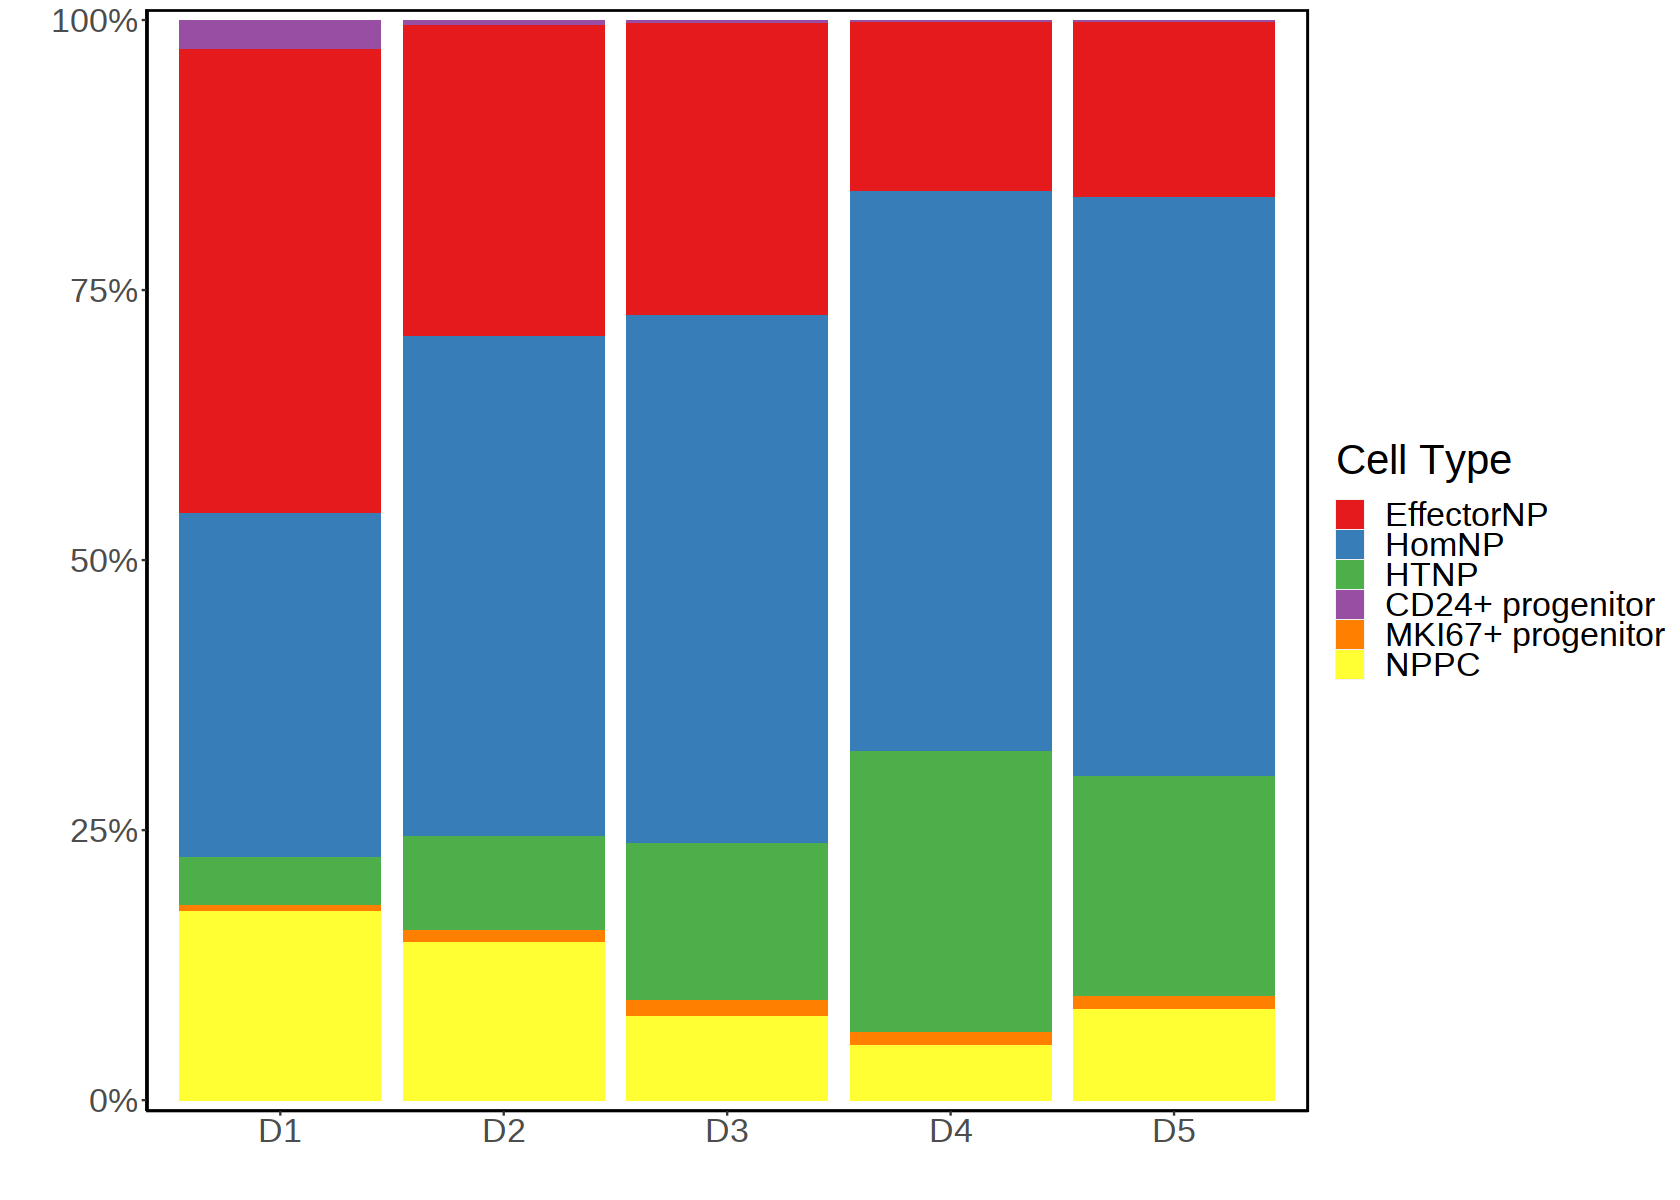

In [93]:
subcelltype.ratio.bar

In [94]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_subcelltype_ratio_bar_change.pdf")
subcelltype.ratio.bar
dev.off()

png 
  2

### plot cellcycle

In [ ]:
Idents(np.ppe) <- np.ppe$Phase
cellcycle.plot <- 
  plot.seu.raster(np.ppe)+ NoAxes()

In [299]:
unique(Idents(np.ppe))

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC             
Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor NPPC

In [302]:
np.ppe.cellcycle.count <- table(np.ppe@meta.data$test.ppe, np.ppe@meta.data$Phase) %>% as.data.frame()

In [305]:
np.ppe.cellcycle.count

cell.type         cellcycle cell.num cell.ratio
1  CD24+ progenitor  G1          212    58.563536 
2  CD24+ progenitor  G2M          64    17.679558 
3  CD24+ progenitor  S            86    23.756906 
4  EffectorNP        G1         8560    57.912185 
5  EffectorNP        G2M        2467    16.690346 
6  EffectorNP        S          3754    25.397470 
7  HomNP             G1        15837    55.279416 
8  HomNP             G2M        4952    17.285071 
9  HomNP             S          7860    27.435513 
10 HTNP              G1         6186    64.183441 
11 HTNP              G2M        1319    13.685412 
12 HTNP              S          2133    22.131148 
13 MKI67+ progenitor G1           14     2.011494 
14 MKI67+ progenitor G2M         413    59.339080 
15 MKI67+ progenitor S           269    38.649425 
16 NPPC              G1         3120    53.133515 
17 NPPC              G2M        1216    20.708447 
18 NPPC              S          1536    26.158038

In [304]:
np.ppe.cellcycle.count <- table(np.ppe@meta.data$test.ppe, np.ppe@meta.data$Phase) %>% as.data.frame()
colnames(np.ppe.cellcycle.count) <- c("cell.type", "cellcycle", "cell.num")
np.ppe.cellcycle.count <- 
    np.ppe.cellcycle.count %>% group_by(cell.type) %>% do({
        df <- .
        df$cell.ratio <- df$cell.num / sum(df$cell.num) * 100
        df
    })

In [310]:
subcelltype.cellcycle.ratio.bar <- 
  np.ppe.cellcycle.count %>% 
    ggplot() +
    geom_bar(aes(x=cell.type, y=cell.ratio, fill=cellcycle), stat = "identity") +
      #scale_fill_manual(values = ppe.ct.color) + 
      scale_y_continuous(limits = c(0,100.1), expand = c(0.01,0.01), 
                         breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%")) +
      labs(x="", y="", fill="Cell cycle\nphase") + 
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            panel.border = element_rect(colour = "black", fill=NA, size=1),
            axis.line = element_line(colour = "black"),
            axis.text.x = element_text(size = 20),
            axis.text.y = element_text(size = 20),
            axis.title = element_text(size = 25),
            legend.text = element_text(size = 20),
            legend.title = element_text(size = 25)) +
    coord_flip()

In [314]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_subcelltype_cellcycle_ratio_bar_change.pdf", width = 10)
subcelltype.cellcycle.ratio.bar
dev.off()

png 
  2

### check GO

In [81]:
unique(Idents(np.ppe))

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC             
Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor NPPC

In [82]:
np.ppe.new.MAST.markers <- 
    FindAllMarkers(np.ppe, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

Calculating cluster EffectorNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HomNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster HTNP


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster CD24+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster MKI67+ progenitor


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster NPPC


Done!

Combining coefficie

In [95]:
write.table(np.ppe.new.MAST.markers, 
             file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/NP/np_ppe_MAST_newctppe_markers_change.txt",
             sep='\t', row.names=F, quote=F)

In [ ]:
np.ppe.new.MAST.markers %>% filter(., cluster == "NPPC")

### plot some VlnPlot

In [2]:
library(ggpubr)

Loading required package: ggplot2



In [258]:
any(np.ppe@assays$RNA@data < 0)

[1] FALSE

In [6]:
select.genes <- c("CD24", "MKI67", "MMP3", "TMSB4X")
select.exp <- np.ppe@assays$RNA@data[select.genes, ] %>% as.matrix() %>% as.data.frame()
select.exp <- t(select.exp) %>% as.data.frame()
select.exp$celltype <- Idents(np.ppe)[rownames(select.exp)]
df <- reshape2::melt(select.exp, id=c("celltype"))
colnames(df)[2:3] <- c("gene", "exp")

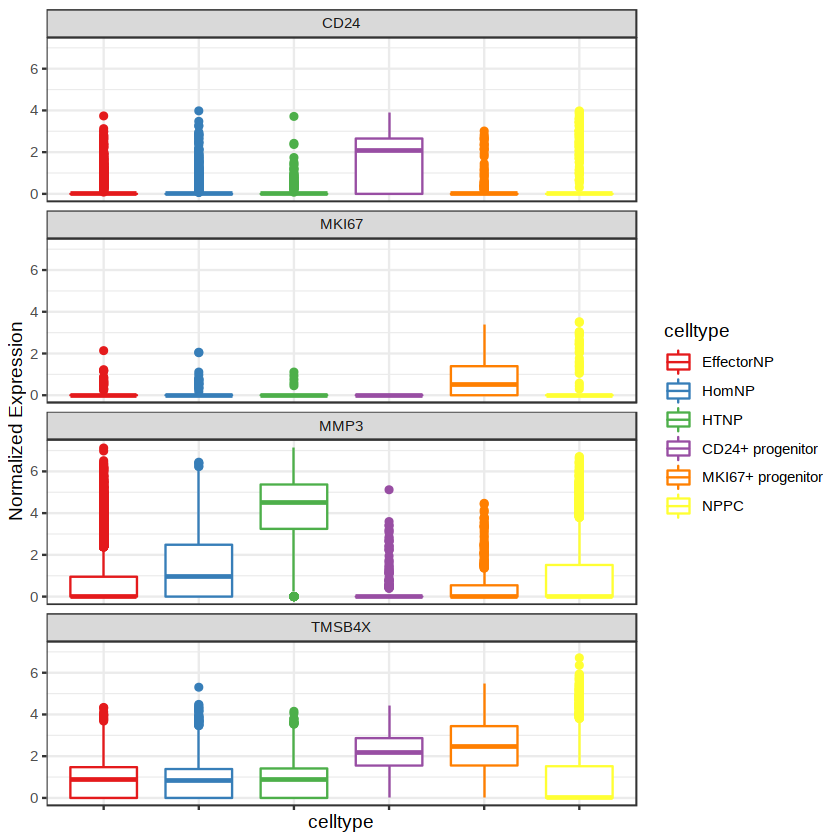

In [31]:
box.p

In [7]:
box.p <- 
    facet(ggboxplot(df, x="celltype", y="exp", color="celltype", ylab = "Normalized Expression") + theme_bw() + 
          theme(axis.text.x = element_blank()) +
         scale_color_manual(values=ppe.ct.color), facet.by = "gene", ncol = 1)
    

In [296]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_some_gene_boxplot.pdf")
box.p
dev.off()

png 
  2

In [8]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig2_NP_PPE_some_gene_boxplot2.pdf")
box.p
dev.off()

png 
  2

### plot heatmap

In [320]:
unique(np.ppe.new.MAST.markers$cluster)

[1] EffectorNP        HomNP             HTNP              CD24+ progenitor 
[5] MKI67+ progenitor NPPC             
Levels: EffectorNP HomNP HTNP CD24+ progenitor MKI67+ progenitor NPPC

In [321]:
np.ppe.new.MAST.markers %>%
  group_by(cluster) %>%
  top_n(n = 10, wt = avg_log2FC) -> top10

In [327]:
top10 %>% filter(., cluster == "NPPC")

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene  
1  0     1.8163215  0.764 0.898 0         NPPC    NEAT1 
2  0     1.5218778  0.286 0.414 0         NPPC    XIST  
3  0     1.4028700  0.965 0.997 0         NPPC    MALAT1
4  0     1.2177989  0.414 0.708 0         NPPC    TMSB4X
5  0     1.0068844  0.601 0.825 0         NPPC    DST   
6  0     0.9523398  0.478 0.615 0         NPPC    COL3A1
7  0     0.8099053  0.473 0.658 0         NPPC    COL1A2
8  0     0.7979482  0.405 0.611 0         NPPC    MEG3  
9  0     0.7958103  0.578 0.878 0         NPPC    LGALS1
10 0     0.7860547  0.706 0.920 0         NPPC    COL6A2

In [322]:
random.cells <- sample(colnames(np.ppe), size = 5000)

In [323]:
subcelltype.heatmap <- 
  DoHeatmap(np.ppe, 
            features = top10$gene, 
            cells = random.cells, 
            label = T,
             group.colors = ppe.ct.color) #+ 
#     scale_fill_gradient2(low="blue", mid="yellow" , high="red")

In [325]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_FigS2_NP_PPE_subcelltype_heatmap.pdf", height=15,width=20)
subcelltype.heatmap
dev.off()

png 
  2

### check EffectorNP trend

In [20]:
efNP.sample.count <- np.ppe.sample.count %>% filter(., cell.type %in% c("EffectorNP", "NPPC"))

In [21]:
efNP.sample.count.plot <- efNP.sample.count %>% group_by(grade, cell.type) %>% summarise(mean.ratio = mean(cell.ratio), sd.ratio = sd(cell.ratio))

`summarise()` has grouped output by 'grade'. You can override using the `.groups` argument.


In [22]:
efNP.sample.count

cell.type  sample cell.num cell.ratio grade
1  EffectorNP D1_1    573     16.887710  D1   
2  NPPC       D1_1    299      8.812261  D1   
3  EffectorNP D1_2   2749     63.457987  D1   
4  NPPC       D1_2   1049     24.215143  D1   
5  EffectorNP D2_1   1264     46.953938  D2   
6  NPPC       D2_1    715     26.560178  D2   
7  EffectorNP D2_2   1068     18.885942  D2   
8  NPPC       D2_2    500      8.841733  D2   
9  EffectorNP D2_3   1074     30.924273  D2   
10 NPPC       D2_3    505     14.540743  D2   
11 EffectorNP D3_1   2569     41.522547  D3   
12 NPPC       D3_1    600      9.697753  D3   
13 EffectorNP D3_2    423     11.519608  D3   
14 NPPC       D3_2    215      5.855120  D3   
15 EffectorNP D3_3    944     20.261859  D3   
16 NPPC       D3_3    314      6.739644  D3   
17 EffectorNP D4_1    442     22.913427  D4   
18 NPPC       D4_1    215     11.145671  D4   
19 EffectorNP D4_2    956     12.823608  D4   
20 NPPC       D4_2    329      4.413146  D4   
21 EffectorNP D4_3    976     16.795732  D4   
22 NPPC       D4_3    225      3.871967  D4   
23 EffectorNP D5_1    663     13.494810  D5   
24 NPPC       D5_1    414      8.426623  D5   
25 EffectorNP D5_2    460     22.094140  D5   
26 NPPC       D5_2    193      9.269933  D5   
27 EffectorNP D5_3    620     16.555407  D5   
28 NPPC       D5_3    299      7.983979  D5

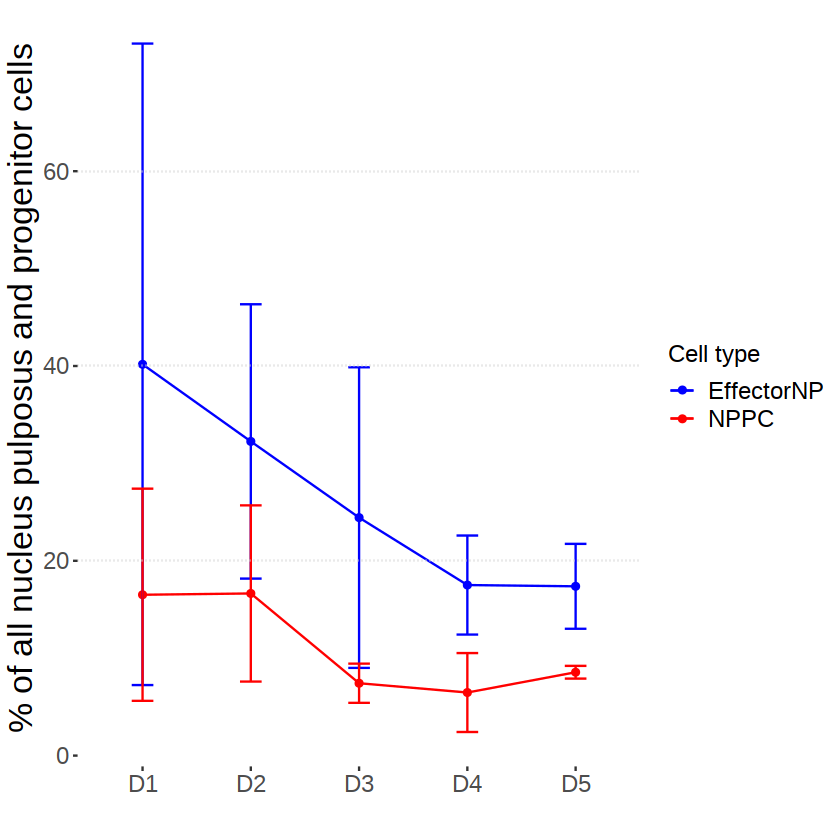

In [25]:
efNP.sample.count.plot %>% 
ggplot(aes(x=grade, y=mean.ratio, group=cell.type, color=cell.type)) + 
        geom_point() +
        geom_line() +
        geom_errorbar(aes(ymin=mean.ratio-sd.ratio, ymax=mean.ratio+sd.ratio), width=0.2) +
        geom_hline(yintercept=c(20, 40, 60), linetype="dotted", col="lightgrey") +
        #scale_y_continuous(labels = paste0(c(0, 1, 2, 3, 4), "%")) +
        scale_color_manual(values=c("blue", "red")) +
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              #axis.line = element_line(colour = "black"),
              axis.text.x = element_text(size = 14),
              axis.text.y = element_text(size = 14),
              legend.text = element_text(size = 14),
              legend.title = element_text(size = 14),
              axis.title = element_text(size=20),
              legend.background = element_blank(),
              legend.key=element_blank()
              ) +
      labs(x="", y="% of all nucleus pulposus and progenitor cells", color="Cell type")